# 06 Comparisons of regions across other measures 

> Look out how the regions with under-diagnosis perform across other measures of dementia care and diagnosis

---

In [28]:
#|default_exp core.04_regression_model

In [29]:
#|export
import dementia_inequalities as proj
from dementia_inequalities import const, log, utils, tools
import adu_proj.utils as adutils

In [67]:
#|export
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import TwoSlopeNorm

from scipy.stats import pearsonr, spearmanr

import geopandas as gpd

---

In [31]:
#|export 
df_reg_model = pd.read_csv(const.output_path+'/reg_model/reg_model_results.csv')
df_IMD_reg_model = pd.read_csv(const.output_path+'/test_set_reg_model/IMD_reg_model_results.csv')
df_GP_reg_model = pd.read_csv(const.output_path+'/test_set_reg_model/GP_reg_model_results.csv')
df_log_norm_model = pd.read_csv(const.output_path+'/log_norm_model/log_norm_model_results.csv')
df_half_norm_model = pd.read_csv(const.output_path+'/half_norm_model/half_norm_model_results.csv')

In [32]:
# Load geojson files of LAD boundaries
gdf_LAD = gpd.read_file(const.data_path+'/LAD_area/LAD_Dec_2021_GB_BFC_2022_-8975151699474964544.geojson')
gdf_LAD = gdf_LAD.to_crs(epsg=3857)

### Merge results from the models into a single dataframe 

In [33]:
df_model_results = df_reg_model.copy()

# add results of regression models trained on test datasets 
df_model_results['IMD_reg_model_residuals'] = df_IMD_reg_model['IMD_reg_model_residuals']
df_model_results['IMD_reg_model_pred'] = df_IMD_reg_model['IMD_reg_model_pred']

# IMD training set - no GP covariate
df_model_results['IMD_reg_model_noGP_residuals'] = df_IMD_reg_model['IMD_reg_model_noGP_residuals']
df_model_results['IMD_reg_model_noGP_pred'] = df_IMD_reg_model['IMD_reg_model_noGP_pred']

# GP training set 
df_model_results['GP_reg_model_residuals'] = df_GP_reg_model['GP_reg_model_residuals']
df_model_results['GP_reg_model_pred'] = df_GP_reg_model['GP_reg_model_pred']

# add results of alternative error models 
df_model_results['log_norm_diagnosis_gap'] = df_log_norm_model['diagnosis_gap']
df_model_results['log_norm_model_pred'] = df_log_norm_model['log_norm_model_pred']

df_model_results['half_norm_diagnosis_gap'] = df_half_norm_model['half_norm_diagnosis_gap']
df_model_results['half_norm_model_pred'] = df_half_norm_model['half_norm_model_pred']

In [34]:
df = pd.merge(gdf_LAD, df_model_results, left_on='LAD21NM', right_on='area_name')
df.drop(columns='area_name', inplace=True)

# df_both_reg_model_results = pd.merge(df, df_IMD_reg_model[['area_name','IMD_reg_model_residuals', 'IMD_reg_model_pred']], left_on='LAD21NM', right_on='area_name')
# df_both_reg_model_results.drop(columns='area_name', inplace=True)

# df_log_model_results = pd.merge(df_both_reg_model_results, df_log_norm_model[['area_name', 'log_norm_model_pred', 'diagnosis_gap']], left_on='LAD21NM', right_on='area_name')
# df_log_model_results.drop(columns='area_name', inplace=True)

# df_model_results = pd.merge(df_log_model_results, df_half_norm_model[['area_name', 'half_norm_model_pred', 'half_norm_diagnosis_gap']], left_on='LAD21NM', right_on='area_name')
# df_model_results.drop(columns='area_name', inplace=True)

### Start with a really basic plot showing the regional variation in dementia diagnosing 

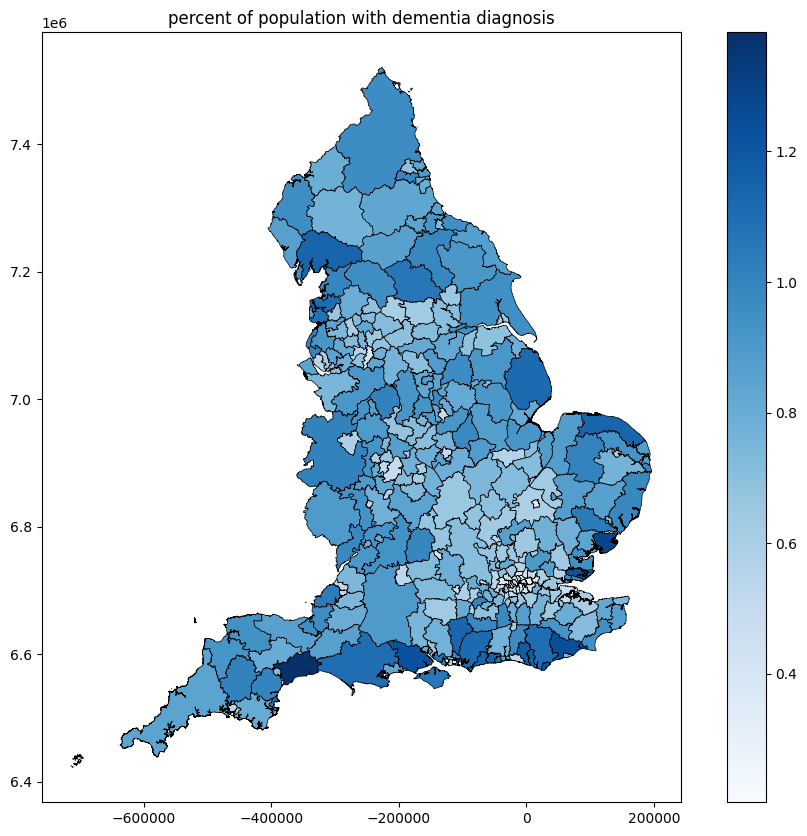

In [35]:
fig, ax = plt.subplots(figsize=(12,10))
df.plot(ax=ax, column='DEM_afflicted_pc', edgecolor='black', linewidth=0.5, alpha=1.0, cmap='Blues', legend=True)
plt.title('percent of population with dementia diagnosis')
plt.show()

In [36]:
df_reg_model

,Unnamed: 0,area_code,area_name,pop,DEM_afflicted,HYP_afflicted,DM_afflicted,STIA_afflicted,ALevel_plus,Female_all,...,female_pc,HYP_afflicted_pc,DM_afflicted_pc,STIA_afflicted_pc,GP_contribution_to_LAD,GP_LAD_pc,reg_model_residuals,reg_model_pred,reg_model_noGP_residuals,reg_model_noGP_pred
0,0,E07000091,New Forest,151481,1858.546949,28892.139020,9338.695410,4466.648271,72749.0,91513.3596,...,60.412434,19.073111,6.164929,2.948652,215.158147,0.142036,0.097822,1.129095,0.096793,1.130125
1,1,E09000027,Richmond upon Thames,156795,1016.262785,16263.714161,5723.913130,2019.443594,112919.0,101226.6730,...,64.559886,10.372597,3.650571,1.287952,437.450820,0.278995,0.044718,0.603430,0.050812,0.597336
2,2,E07000116,Tunbridge Wells,95022,876.255260,12908.434533,4606.674451,1889.024705,52395.0,59540.1412,...,62.659322,13.584680,4.848008,1.987987,123.466346,0.129934,0.151230,0.770931,0.148936,0.773225
3,3,E07000121,Lancaster,123214,1228.376774,16806.421220,6784.714317,2647.583108,65724.0,72615.6480,...,58.934576,13.640026,5.506448,2.148768,612.399689,0.497021,0.191349,0.805597,0.214201,0.782745
4,4,E07000042,Mid Devon,67987,547.793487,10854.465333,4281.878984,1530.207441,33190.0,42541.3752,...,62.572808,15.965501,6.298085,2.250735,77.360723,0.113788,-0.092747,0.898480,-0.095101,0.900834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,304,E07000098,Hertsmere,82921,670.292640,11021.724346,4685.682668,1328.437922,46875.0,56088.1445,...,67.640458,13.291837,5.650779,1.602052,222.131324,0.267883,0.106923,0.701428,0.114304,0.694047
305,305,E08000024,Sunderland,228781,1815.593270,39805.733965,15607.611455,5391.466952,94211.0,141179.1277,...,61.709289,17.399056,6.822075,2.356606,398.125138,0.174020,-0.072001,0.865596,-0.070355,0.863950
306,306,E06000050,Cheshire West and Chester,281913,2115.072286,42946.758704,16327.686339,5778.511168,157848.0,182966.3133,...,64.901694,15.234047,5.791747,2.049750,293.938550,0.104266,-0.079772,0.830029,-0.083849,0.834106
307,307,E07000210,Mole Valley,72165,707.782207,10694.196102,3455.860767,1495.801962,42396.0,44954.5255,...,62.294084,14.819090,4.788832,2.072753,117.926289,0.163412,0.095084,0.885699,0.094895,0.885888


In [37]:
df[df['LAD21NM']=='City of London'][['pop', 'DEM_afflicted', 'GP_contribution_to_LAD', 'over_65_pc', 'ALevel_plus_pc']]

,pop,DEM_afflicted,GP_contribution_to_LAD,over_65_pc,ALevel_plus_pc
276,9259,19.951857,20.901767,13.321125,71.78961


In [38]:
df['GP_per_1000'] = df['GP_LAD_pc']*1000

And also a plot to show the geographic variation in the density of GP doctors. 

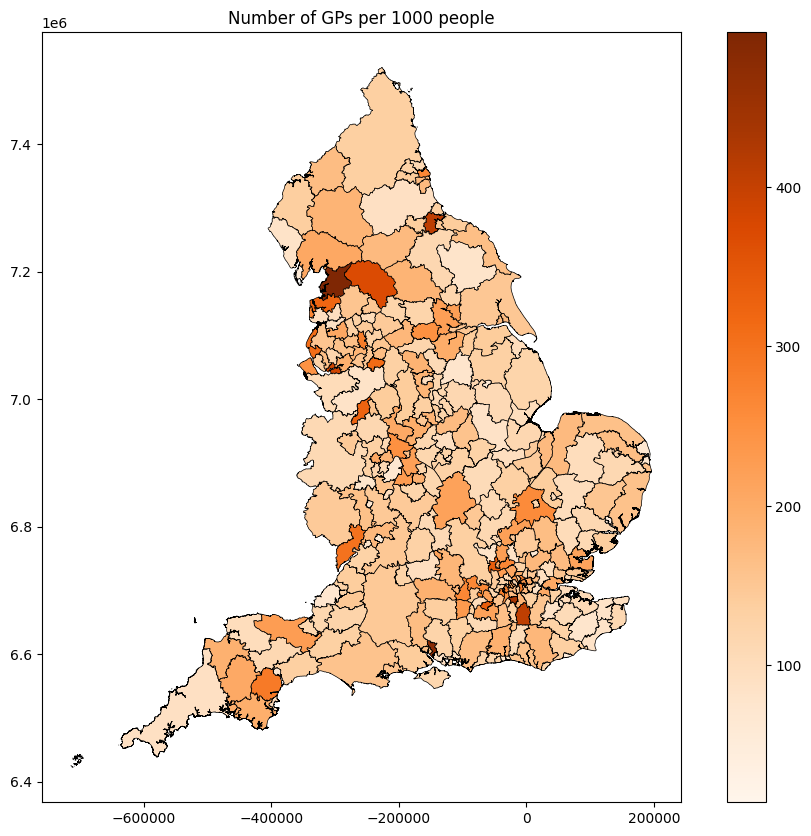

In [39]:
fig, ax = plt.subplots(figsize=(12,10))
df.plot(ax=ax, column='GP_per_1000', edgecolor='black', linewidth=0.5, alpha=1.0, cmap='Oranges', legend=True)
plt.title('Number of GPs per 1000 people')
plt.show()

### Geopandas plot for the diagnosis gap according to the log normal model 

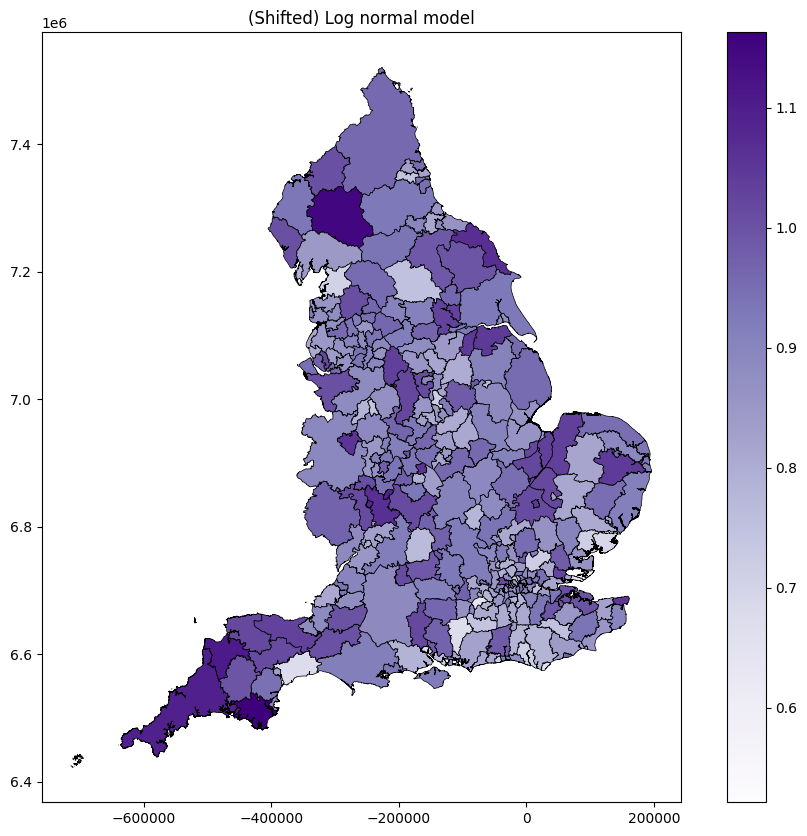

In [40]:
fig, ax = plt.subplots(figsize=(12,10))
df.plot(ax=ax, column='log_norm_diagnosis_gap', edgecolor='black', linewidth=0.5, alpha=1.0, cmap='Purples', legend=True)
plt.title('(Shifted) Log normal model')
plt.show()

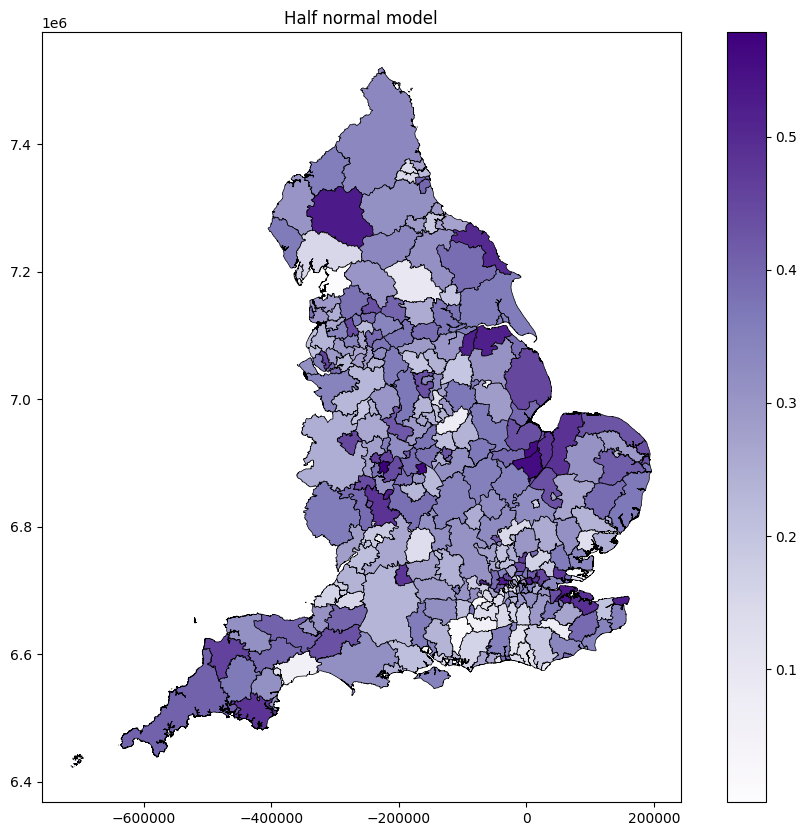

In [41]:
fig, ax = plt.subplots(figsize=(12,10))
df.plot(ax=ax, column='half_norm_diagnosis_gap', edgecolor='black', linewidth=0.5, alpha=1.0, cmap='Purples', legend=True)
plt.title('Half normal model')
plt.show()

## Create custom colormap 

In [42]:
def custom_cmap():
    # Define the colors
    colors = [(0, 'indigo'), (0.5, 'white'), (1, 'green')]
    
    # Create the colormap
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
    return cmap

# Create custom colormap
cmap_custom = custom_cmap()

### Geopandas plot for the residuals of the multiple linear regression model 

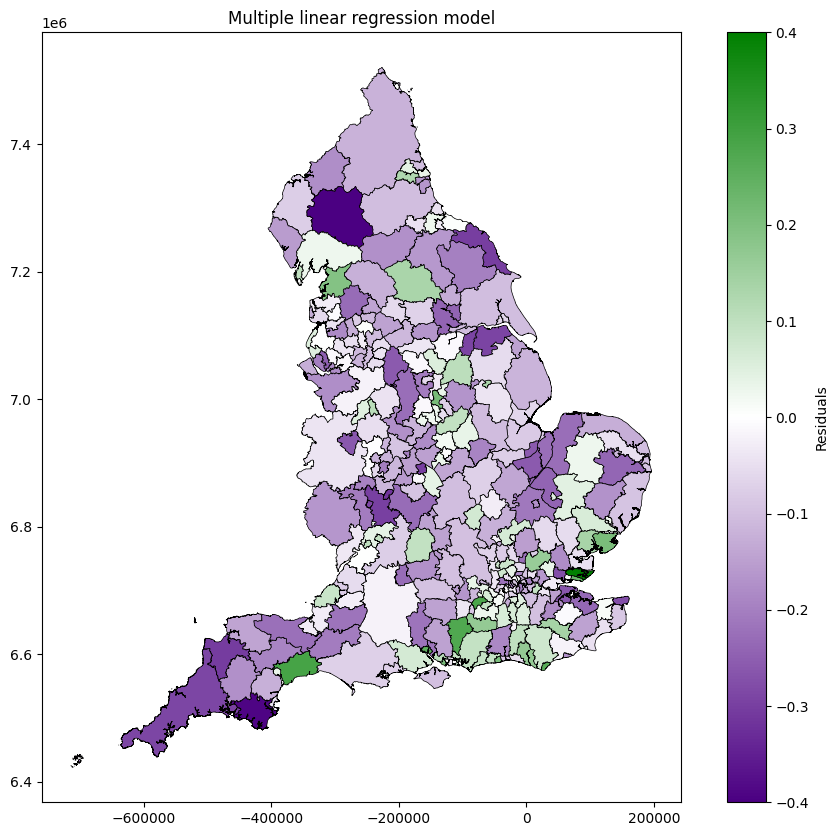

In [43]:
# Plotting the data
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting residuals
df.plot(ax=ax, column='reg_model_residuals', edgecolor='black', linewidth=0.5, alpha=1.0, cmap=cmap_custom, legend=False)

# Create custom colorbar
#norm = TwoSlopeNorm(vmin=df['reg_model_residuals'].min(), vcenter=0, vmax=df['reg_model_residuals'].max())
alt_norm = TwoSlopeNorm(vmin=-0.4, vcenter=0, vmax=0.4)
cbar = plt.cm.ScalarMappable(cmap=cmap_custom, norm=alt_norm)
cbar.set_array([])
plt.colorbar(cbar, ax=ax, orientation='vertical', label='Residuals')

plt.title('Multiple linear regression model')
plt.show()

plt.show()


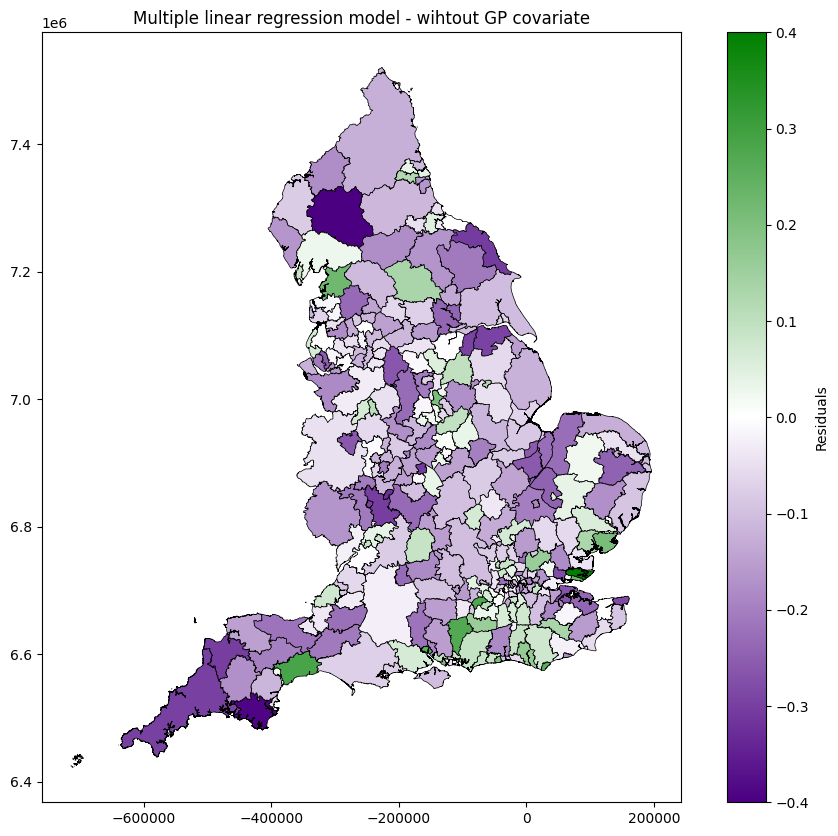

In [44]:
# Plotting the data
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting residuals
df.plot(ax=ax, column='reg_model_noGP_residuals', edgecolor='black', linewidth=0.5, alpha=1.0, cmap=cmap_custom, legend=False)

# Create custom colorbar
#norm = TwoSlopeNorm(vmin=df['reg_model_residuals'].min(), vcenter=0, vmax=df['reg_model_residuals'].max())
alt_norm = TwoSlopeNorm(vmin=-0.4, vcenter=0, vmax=0.4)
cbar = plt.cm.ScalarMappable(cmap=cmap_custom, norm=alt_norm)
cbar.set_array([])
plt.colorbar(cbar, ax=ax, orientation='vertical', label='Residuals')

plt.title('Multiple linear regression model - wihtout GP covariate')
plt.show()

plt.show()

### Geopandas plot for the residuals of the multiple linear regression model trained on the least deprived regions (according to the IMD)

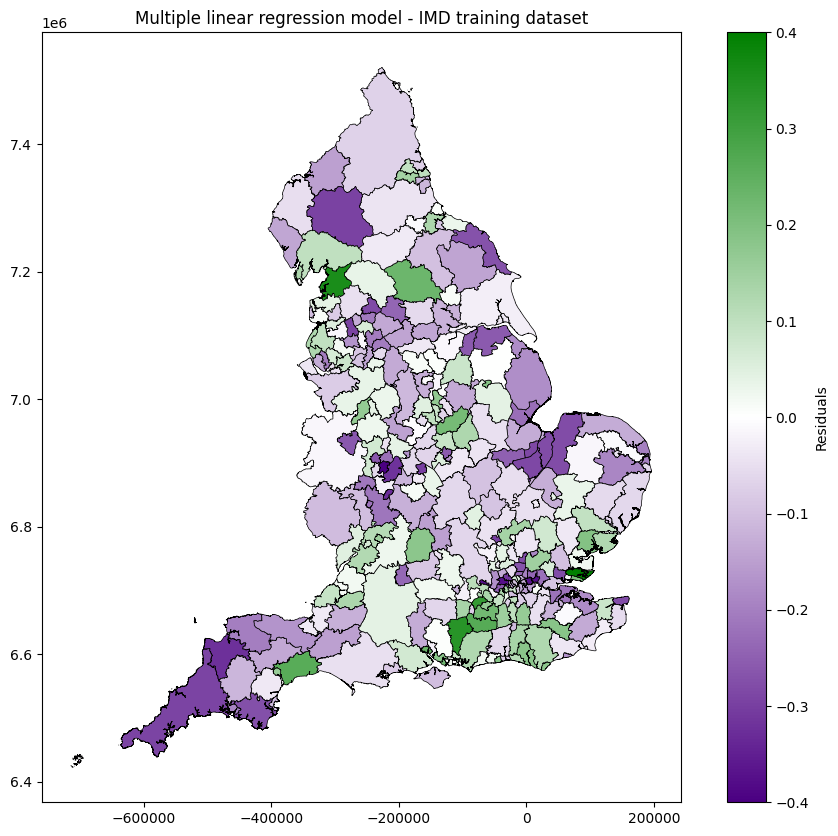

In [45]:
# Plotting the data
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting residuals
df.plot(ax=ax, column='IMD_reg_model_residuals', edgecolor='black', linewidth=0.5, alpha=1.0, cmap=cmap_custom, legend=False)

# Create custom colorbar
#norm = TwoSlopeNorm(vmin=df['IMD_reg_model_residuals'].min(), vcenter=0, vmax=df['IMD_reg_model_residuals'].max())
alt_norm = TwoSlopeNorm(vmin=-0.4, vcenter=0, vmax=0.4)
cbar = plt.cm.ScalarMappable(cmap=cmap_custom, norm=alt_norm)
cbar.set_array([])
plt.colorbar(cbar, ax=ax, orientation='vertical', label='Residuals')

plt.title('Multiple linear regression model - IMD training dataset')
plt.show()

plt.show()


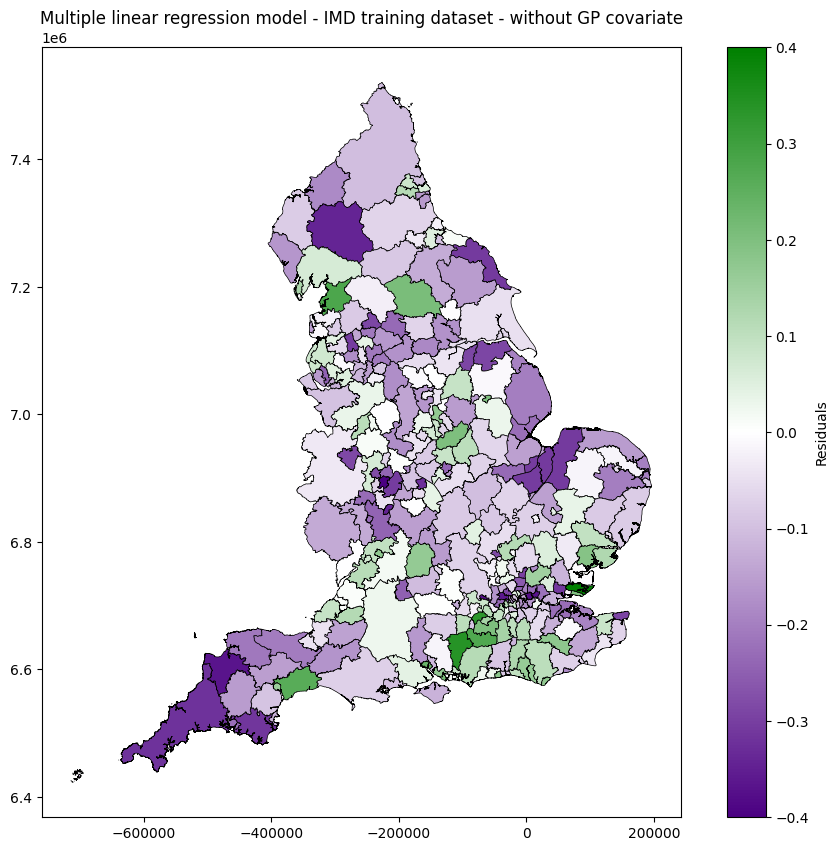

In [46]:
# Plotting the data
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting residuals
df.plot(ax=ax, column='IMD_reg_model_noGP_residuals', edgecolor='black', linewidth=0.5, alpha=1.0, cmap=cmap_custom, legend=False)

# Create custom colorbar
#norm = TwoSlopeNorm(vmin=df['IMD_reg_model_residuals'].min(), vcenter=0, vmax=df['IMD_reg_model_residuals'].max())
alt_norm = TwoSlopeNorm(vmin=-0.4, vcenter=0, vmax=0.4)
cbar = plt.cm.ScalarMappable(cmap=cmap_custom, norm=alt_norm)
cbar.set_array([])
plt.colorbar(cbar, ax=ax, orientation='vertical', label='Residuals')

plt.title('Multiple linear regression model - IMD training dataset - without GP covariate')
plt.show()

plt.show()


### Geopandas plot for the residuals of the multiple linear regression model trained on the areas with highest GP density

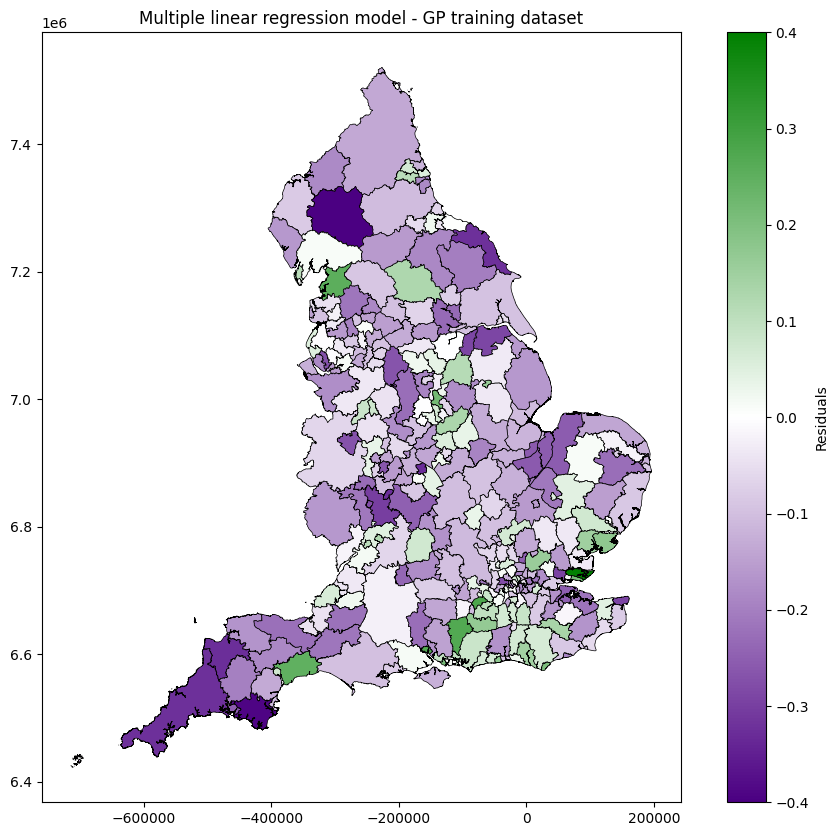

In [47]:
# Plotting the data
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting residuals
df.plot(ax=ax, column='GP_reg_model_residuals', edgecolor='black', linewidth=0.5, alpha=1.0, cmap=cmap_custom, legend=False)

# Create custom colorbar
#norm = TwoSlopeNorm(vmin=df['GP_reg_model_residuals'].min(), vcenter=0, vmax=df['GP_reg_model_residuals'].max())
alt_norm = TwoSlopeNorm(vmin=-0.4, vcenter=0, vmax=0.4)
cbar = plt.cm.ScalarMappable(cmap=cmap_custom, norm=alt_norm)
cbar.set_array([])
plt.colorbar(cbar, ax=ax, orientation='vertical', label='Residuals')

plt.title('Multiple linear regression model - GP training dataset')
plt.show()

plt.show()


In [48]:
reg_worst = np.argsort(df['reg_model_residuals'].values)[:10]

In [49]:
# df[['reg_model_residuals', 'IMD_reg_model_residuals', 'GP_reg_model_residuals']] = df[['reg_model_residuals', 'IMD_reg_model_residuals', 'GP_reg_model_residuals']].abs()

In [50]:
bottom_10 = df.iloc[np.argsort(df['reg_model_residuals'].values)[:10]]['LAD21NM'].reset_index()
bottom_10.drop(columns='index', inplace=True)
bottom_10.columns = ['regression_model']

In [51]:
bottom_10['regression_model_IMD'] = df.iloc[np.argsort(df['IMD_reg_model_residuals'].values)[:10]]['LAD21NM'].values
bottom_10['regression_model_GP'] = df.iloc[np.argsort(df['GP_reg_model_residuals'].values)[:10]]['LAD21NM'].values

# include the results from the alternative error term models 
bottom_10['log_norm_model'] = df.iloc[np.argsort(df['log_norm_diagnosis_gap'].values)[-10:]]['LAD21NM'].values[::-1]
bottom_10['half_norm_model'] = df.iloc[np.argsort(df['half_norm_diagnosis_gap'].values)[-10:]]['LAD21NM'].values[::-1]

In [52]:
bottom_10

,regression_model,regression_model_IMD,regression_model_GP,log_norm_model,half_norm_model
0,Eden,Sandwell,Eden,South Hams,Sandwell
1,South Hams,Slough,South Hams,Eden,Nuneaton and Bedworth
2,City of London,Ealing,Nuneaton and Bedworth,Torridge,Fenland
3,Redditch,Barking and Dagenham,Torridge,Cornwall,Medway
4,Torridge,Newham,Redditch,Plymouth,Ealing
5,Nuneaton and Bedworth,Redditch,Cornwall,Redditch,Eden
6,Scarborough,Torridge,Scarborough,Worcester,North Lincolnshire
7,Wychavon,Birmingham,Wychavon,Scarborough,Thanet
8,Plymouth,Brent,Basildon,Wychavon,Newham
9,North Lincolnshire,Nuneaton and Bedworth,Thanet,Nuneaton and Bedworth,Redditch


## Statistics to compare the models 

* We compare the residuals across the models using Pearson R correlation coefficient.
* We look at how many regions overlap in the bottom 20 across models. 
* We look at how mnay regions overlap in the top 20 across models.  

In [53]:
df_model_resid = df_model_results[['reg_model_residuals', 'reg_model_noGP_residuals', 'IMD_reg_model_residuals', 'IMD_reg_model_noGP_residuals', 'GP_reg_model_residuals', 'log_norm_diagnosis_gap', 'half_norm_diagnosis_gap']]

In [69]:
n = len(df_model_resid.columns)
pearsonr_matrix = np.zeros((n, n))
spearmanr_matrix = np.zeros((n, n))
for i, col_i in enumerate(df_model_resid.columns):
    for j, col_j in enumerate(df_model_resid.columns):
        pearsonr_matrix[i,j] = pearsonr(df_model_resid[col_i], df_model_resid[col_j])[0]
        spearmanr_matrix[i,j] = spearmanr(df_model_resid[col_i], df_model_resid[col_j])[0]

A correlation of 1 indicates that there is a strong positive linear relationship. A correletion of -1 indicates there is a strong negative linear relationship. Note that models 1, 2 and 3, have both positive and negative residuals. Models 3 and 4 have strictly positive residuals. 

In [70]:
pearsonr_matrix

array([[ 1.        ,  0.99875335,  0.79015642,  0.82893938,  0.97132764,
        -0.97353489, -0.81784865],
       [ 0.99875335,  1.        ,  0.79573406,  0.82997407,  0.97254005,
        -0.97447412, -0.81867004],
       [ 0.79015642,  0.79573406,  1.        ,  0.99249334,  0.87860105,
        -0.76127418, -0.92537208],
       [ 0.82893938,  0.82997407,  0.99249334,  1.        ,  0.90913516,
        -0.79517349, -0.93726529],
       [ 0.97132764,  0.97254005,  0.87860105,  0.90913516,  1.        ,
        -0.94892128, -0.88791617],
       [-0.97353489, -0.97447412, -0.76127418, -0.79517349, -0.94892128,
         1.        ,  0.76613642],
       [-0.81784865, -0.81867004, -0.92537208, -0.93726529, -0.88791617,
         0.76613642,  1.        ]])

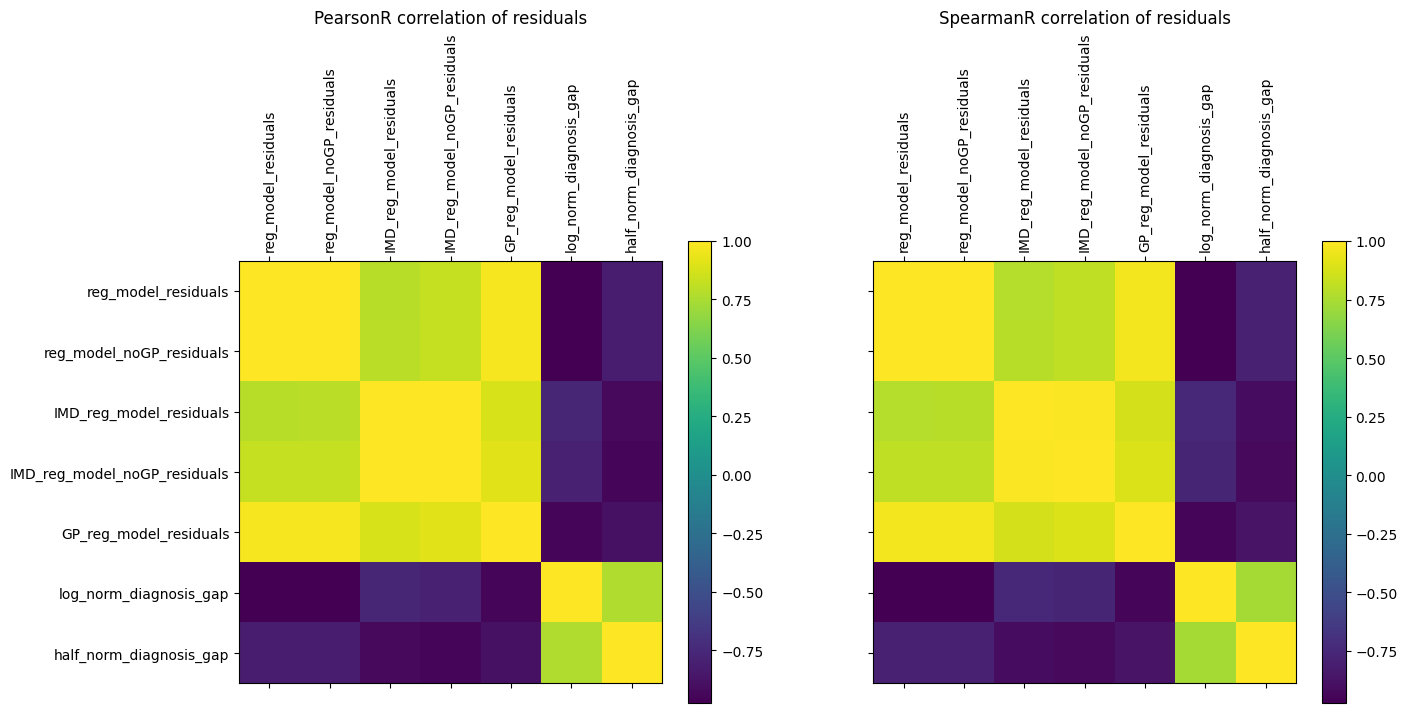

In [84]:
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,6))
fig = plt.figure(figsize = (15,6))

#plt.subplot(1, 2, 1)
ax1 = fig.add_subplot(121)
cax = ax1.matshow(pearsonr_matrix)
fig.colorbar(cax)

xaxis = np.arange(len(df_model_resid.columns))
ax1.set_xticks(xaxis)
ax1.set_yticks(xaxis)
ax1.tick_params(axis='x', rotation=90)
ax1.set_xticklabels(df_model_resid.columns)
ax1.set_yticklabels(df_model_resid.columns)
ax1.set_title('PearsonR correlation of residuals')


#plt.subplot(1, 2, 2)
ax2 = fig.add_subplot(122)
cax = ax2.matshow(spearmanr_matrix)
fig.colorbar(cax)

xaxis = np.arange(len(df_model_resid.columns))
ax2.set_xticks(xaxis)
ax2.set_yticks(xaxis)
ax2.tick_params(axis='x', rotation=90)
ax2.set_xticklabels(df_model_resid.columns)
ax2.set_yticklabels([])
ax2.set_title('SpearmanR correlation of residuals')

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(pearsonr_matrix, interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(len(df_model_resid.columns))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.tick_params(axis='x', rotation=90)
ax.set_xticklabels(df_model_resid.columns)
ax.set_yticklabels(df_model_resid.columns)
ax.set_title('PearsonR correlation of residuals')

plt.show()

In [57]:
N = 20
bottom_N = df.iloc[np.argsort(df['reg_model_residuals'].values)[:N]]['LAD21NM'].reset_index()
bottom_N.drop(columns='index', inplace=True)
bottom_N.columns = ['regression_model']

bottom_N['reg_model_noGP_residuals'] = df.iloc[np.argsort(df['reg_model_noGP_residuals'].values)[:N]]['LAD21NM'].values
bottom_N['regression_model_IMD'] = df.iloc[np.argsort(df['IMD_reg_model_residuals'].values)[:N]]['LAD21NM'].values
bottom_N['regression_model_noGP_IMD'] = df.iloc[np.argsort(df['IMD_reg_model_residuals'].values)[:N]]['LAD21NM'].values
bottom_N['regression_model_GP'] = df.iloc[np.argsort(df['GP_reg_model_residuals'].values)[:N]]['LAD21NM'].values

# include the results from the alternative error term models 
bottom_N['log_norm_model'] = df.iloc[np.argsort(df['log_norm_diagnosis_gap'].values)[-N:]]['LAD21NM'].values[::-1]
bottom_N['half_norm_model'] = df.iloc[np.argsort(df['half_norm_diagnosis_gap'].values)[-N:]]['LAD21NM'].values[::-1]

In [58]:
bottom_N

,regression_model,reg_model_noGP_residuals,regression_model_IMD,regression_model_noGP_IMD,regression_model_GP,log_norm_model,half_norm_model
0,Eden,Eden,Sandwell,Sandwell,Eden,South Hams,Sandwell
1,South Hams,South Hams,Slough,Slough,South Hams,Eden,Nuneaton and Bedworth
2,City of London,City of London,Ealing,Ealing,Nuneaton and Bedworth,Torridge,Fenland
3,Redditch,Redditch,Barking and Dagenham,Barking and Dagenham,Torridge,Cornwall,Medway
4,Torridge,Nuneaton and Bedworth,Newham,Newham,Redditch,Plymouth,Ealing
5,Nuneaton and Bedworth,Scarborough,Redditch,Redditch,Cornwall,Redditch,Eden
6,Scarborough,Torridge,Torridge,Torridge,Scarborough,Worcester,North Lincolnshire
7,Wychavon,Wychavon,Birmingham,Birmingham,Wychavon,Scarborough,Thanet
8,Plymouth,Worcester,Brent,Brent,Basildon,Wychavon,Newham
9,North Lincolnshire,Cornwall,Nuneaton and Bedworth,Nuneaton and Bedworth,Thanet,Nuneaton and Bedworth,Redditch


In [59]:
n = len(bottom_N.columns)
intersection_matrix = np.zeros((n, n))
for i, col_i in enumerate(bottom_N.columns):
    for j, col_j in enumerate(bottom_N.columns):
        A = set(bottom_N[col_i].values.flatten())
        B = set(bottom_N[col_j].values.flatten())  
        intersection_matrix[i,j] = len(A.intersection(B))

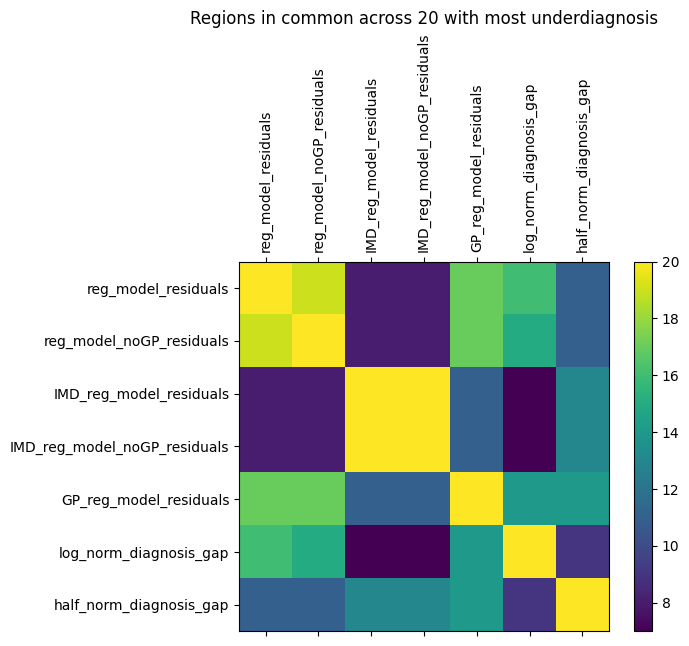

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(intersection_matrix, interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(len(df_model_resid.columns))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.tick_params(axis='x', rotation=90)
ax.set_xticklabels(df_model_resid.columns)
ax.set_yticklabels(df_model_resid.columns)
ax.set_title('Regions in common across 20 with most underdiagnosis')

plt.show()

In [61]:
df_model_resid

,reg_model_residuals,reg_model_noGP_residuals,IMD_reg_model_residuals,IMD_reg_model_noGP_residuals,GP_reg_model_residuals,log_norm_diagnosis_gap,half_norm_diagnosis_gap
0,0.097822,0.096793,0.004348,-0.001903,0.045483,0.785258,0.210672
1,0.044718,0.050812,0.055570,0.048325,0.051462,0.857033,0.127821
2,0.151230,0.148936,0.098166,0.101994,0.136795,0.750721,0.074594
3,0.191349,0.214201,0.238217,0.181119,0.224007,0.704010,0.000001
4,-0.092747,-0.095101,-0.162971,-0.152533,-0.103440,1.012651,0.393623
...,...,...,...,...,...,...,...
304,0.106923,0.114304,-0.010010,-0.009256,0.075094,0.789575,0.214291
305,-0.072001,-0.070355,-0.144676,-0.159221,-0.100963,0.945672,0.395768
306,-0.079772,-0.083849,-0.118623,-0.109691,-0.095869,1.003260,0.343551
307,0.095084,0.094895,0.071142,0.073234,0.084487,0.804159,0.147060


In [62]:
df_model_resid_norm = df_model_resid.copy()

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

df_model_resid_norm['reg_model_residuals'] = NormalizeData(-df_model_resid['reg_model_residuals'].values)
df_model_resid_norm['IMD_reg_model_residuals'] = NormalizeData(-df_model_resid['IMD_reg_model_residuals'].values)
df_model_resid_norm['GP_reg_model_residuals'] = NormalizeData(-df_model_resid['GP_reg_model_residuals'].values)


In [63]:
n = len(df_model_resid_norm.columns)
std_resid_matrix = np.zeros((n, n))
for i, col_i in enumerate(df_model_resid_norm.columns):
    for j, col_j in enumerate(df_model_resid_norm.columns):
        std_resid_matrix[i,j] = np.std(df_model_resid_norm[col_i] - df_model_resid_norm[col_j])

In [64]:
n = len(df_model_resid_norm.columns)
abs_mean_resid_matrix = np.zeros((n, n))
for i, col_i in enumerate(df_model_resid_norm.columns):
    for j, col_j in enumerate(df_model_resid_norm.columns):
        abs_mean_resid_matrix[i,j] = np.mean(np.abs(df_model_resid_norm[col_i] - df_model_resid_norm[col_j]))

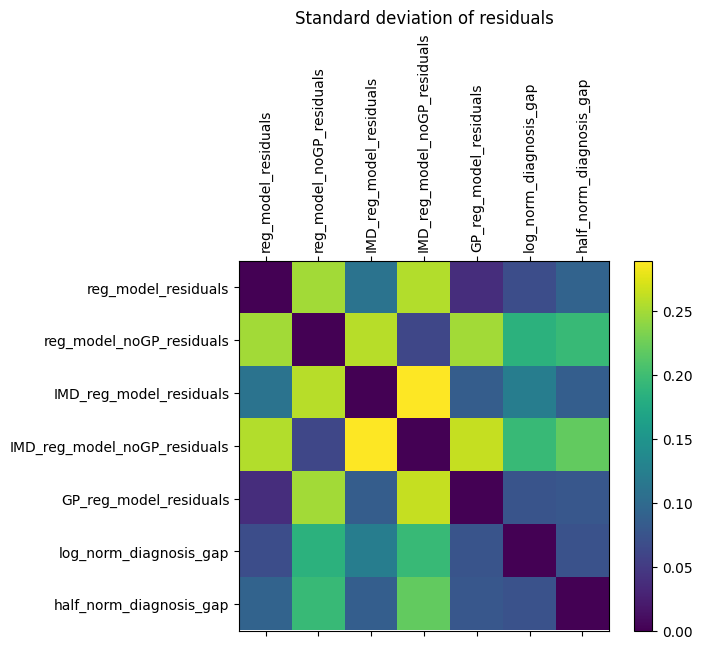

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(std_resid_matrix, interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(len(df_model_resid_norm.columns))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.tick_params(axis='x', rotation=90)
ax.set_xticklabels(df_model_resid_norm.columns)
ax.set_yticklabels(df_model_resid_norm.columns)
ax.set_title('Standard deviation of residuals')

plt.show()

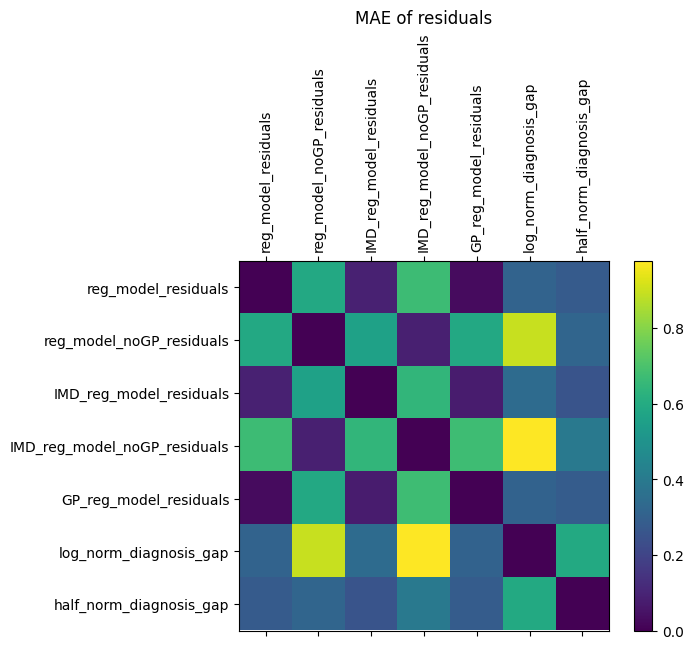

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(abs_mean_resid_matrix, interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(len(df_model_resid_norm.columns))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.tick_params(axis='x', rotation=90)
ax.set_xticklabels(df_model_resid_norm.columns)
ax.set_yticklabels(df_model_resid_norm.columns)
ax.set_title('MAE of residuals')

plt.show()